# Preliminary ML Pipeline for CO$_2$ Research Applications

# Importing modules


**Required Libraries and Dependencies**<br>
Essential Python packages and libraries imported for CO₂ solubility modeling, analysis, and visualization.

**Data Processing & Analysis:**
```python
import pandas as pd
import numpy as np
import scipy
```
**Machine Learning and Model Selection**
```python  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
```
**Visualisation**
```python
import matplotlib.pyplot as plt
import seaborn as sns
```
**Model Explainability**
```python
!pip install shap
import shap
```
**Environment Setup**
```python
from google.colab import drive
```

Library Purposes:<br>

pandas/numpy: Data manipulation and numerical computations  
sklearn: Machine learning algorithms and evaluation metrics  
matplotlib/seaborn: Statistical plotting and visualization  
SHAP: Model interpretation and feature importance analysis  
Google Colab: Cloud-based development environment with GPU/TPU access

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
!pip install shap
import shap


Each machine learning model follows a process


1. EDA and Preprocessing
2. Modelling
3. Hyperparameter tuning and selection.
4. Cross-validation
5. Choosing of best model
6. Metrics and plotting of graphs.



# Mounting the drive

In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Research_Project_with_Turkson/CO2_Solubility/CO2_solubility.xlsx"
path_2 = "/content/drive/MyDrive/Research_Project_with_Turkson/CO2_Solubility/CO2_Solubility1.xlsx"

In [ ]:
df = pd.read_excel(path_2)

Dropping all Text based columns first

In [ ]:
df = df.drop(["Salt type",'References', 'Title'], axis = 1)
df.dropna(inplace = True)

In [ ]:
df.shape

(927, 4)

# 🔍 Comprehensive Exploratory Data Analysis (EDA) - Scatter Matrix<br>
Purpose: Generate a comprehensive pairwise scatter plot matrix to visualize relationships between all variables and identify patterns, distributions, and potential correlations across the entire dataset.
Implementation: <br>

Creates large-format scatter matrix using pandas plotting functionality<br>
Displays pairwise relationships for all numerical features<br>
Generates diagonal histograms showing individual variable distributions<br>
Saves high-resolution visualization to Google Drive for detailed analysis

Key Features:<br>

✅ Pairwise scatter plots for all variable combinations<br>
✅ Diagonal histograms for distribution analysis<br>
✅ Large figure size (50x50) for detailed examination<br>
✅ High-resolution PDF output for publication quality<br>
✅ Comprehensive overview of dataset structure

Output: <br>

Complete pairwise relationship visualization<br>
Individual variable distribution profiles<br>
Pattern identification across feature space<br>
Saved as EDA_plot1.pdf in project directory

Analytical Value: Enables rapid identification of linear/non-linear relationships, outliers, clustering patterns, and distributional characteristics essential for feature engineering and model selection decisions.

<Figure size 5000x5000 with 0 Axes>

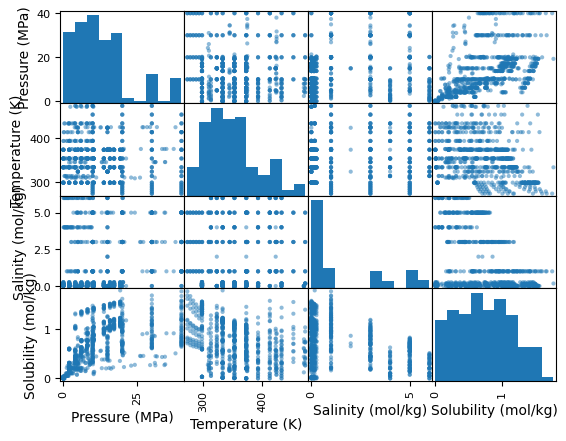

In [ ]:
plt.figure(figsize=(50,50))
figure = pd.plotting.scatter_matrix(df)
plt.savefig("/content/drive/MyDrive/Research_Project_with_Turkson/CO2_Solubility/EDA_plot1.pdf")
plt.show()

# 📊 Feature Correlation Analysis and Visualization  
Purpose: Generate comprehensive correlation heatmaps using multiple correlation methods and automatically identify potentially problematic feature relationships.
Implementation:

Custom function computes correlation matrices using specified methods (Pearson, Spearman, or Kendall)  
Creates annotated heatmap visualizations with seaborn
  
Systematically flags correlations exceeding ±0.6 threshold for multicollinearity screening
  
Saves high-resolution plots to Google Drive for documentation

Key Features:

✅ Multiple correlation methods supported
  
  ✅ Automatic threshold-based correlation filtering
  
  ✅ Publication-ready heatmap visualizations
  
  ✅ Direct Google Drive integration for file storage
  
  ✅ Returns filtered correlation matrices for further analysis

Output:

High-resolution heatmap visualizations saved as PDF files
  
  Automated extraction of high positive correlations (>0.6)
  
  Automated extraction of high negative correlations (<-0.6)
  
  Visual and quantitative assessment of feature relationships

  
Statistical Value: Enables rapid identification of redundant features and potential multicollinearity issues while providing publication-ready visualizations for comprehensive data exploration and model validation.

In [ ]:
def correlation_heatmap(data,method):
  # a function to print out all necessary graphs and correlations out
  plt.figure(figsize = (5,5))
  corr = data.corr(method)
  corr_plot = sns.heatmap(corr,annot=True)
  plt.savefig(f"/content/drive/MyDrive/Research_Project_with_Turkson/CO2_Solubility/{method}.pdf")
  plt.show()
  return corr[corr > 0.6] , corr [corr < -0.6]


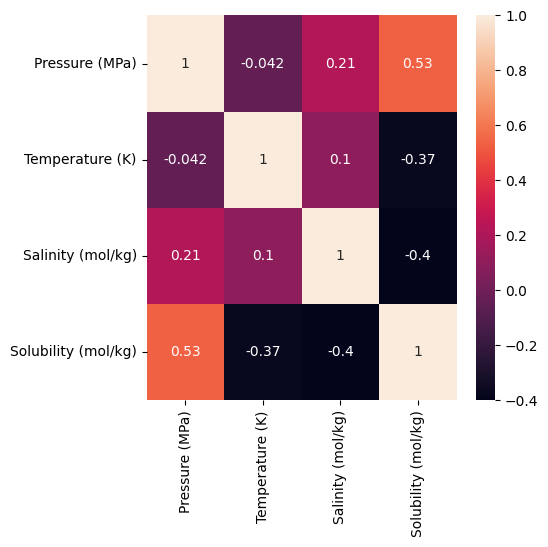

,Pressure (MPa),Temperature (K),Salinity (mol/kg),Solubility (mol/kg)
Pressure (MPa),1.0,NaN,NaN,NaN
Temperature (K),NaN,1.0,NaN,NaN
Salinity (mol/kg),NaN,NaN,1.0,NaN
Solubility (mol/kg),NaN,NaN,NaN,1.0


In [ ]:
pearson= correlation_heatmap(df, 'pearson')
pearson[0]

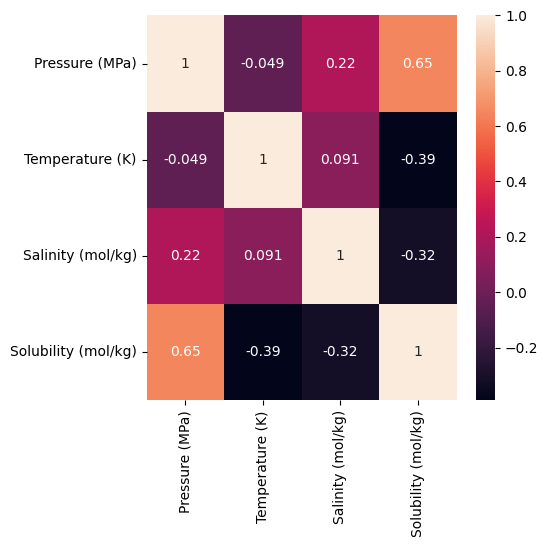

,Pressure (MPa),Temperature (K),Salinity (mol/kg),Solubility (mol/kg)
Pressure (MPa),1.000000,NaN,NaN,0.648176
Temperature (K),NaN,1.0,NaN,NaN
Salinity (mol/kg),NaN,NaN,1.0,NaN
Solubility (mol/kg),0.648176,NaN,NaN,1.000000


In [ ]:
spearman = correlation_heatmap(df, 'spearman')
spearman [0]

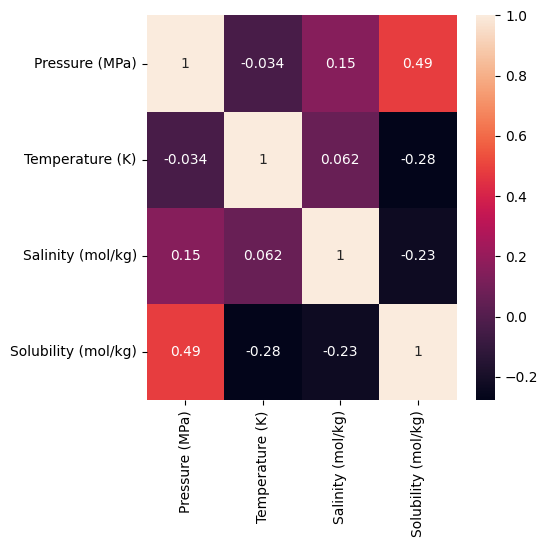

,Pressure (MPa),Temperature (K),Salinity (mol/kg),Solubility (mol/kg)
Pressure (MPa),1.0,NaN,NaN,NaN
Temperature (K),NaN,1.0,NaN,NaN
Salinity (mol/kg),NaN,NaN,1.0,NaN
Solubility (mol/kg),NaN,NaN,NaN,1.0


In [ ]:
kendall = correlation_heatmap(df, 'kendall')
kendall[0]

In [ ]:
X = df.drop(['Solubility (mol/kg)'], axis=1)
y = df["Solubility (mol/kg)"]
column_names = X.columns

###Multicollinearity Assessment via Variance Inflation Factor (VIF)
1. Purpose: Detect and quantify multicollinearity among predictor variables to ensure model reliability and coefficient interpretability.
2. Statistical Significance: VIF values well below the conventional threshold (VIF < 5) validate that each predictor contributes unique information, ensuring stable coefficient estimates and reliable model interpretation.

In [ ]:
# calculating VIF
# There's a Scipy API for doing this but I didn'tknow so I just looked up the formula and built it in myself.

def VIF (X):
  #the function is to take in X and iteratively drop that column and perform a regression and then use it to calculate VIF
  #First it to get all colums of X and initialize some empty list
  r2_score = []
  VIF = []
  columns = X.columns

  # instantiate Linear regression
  lr= LinearRegression()

  #Now the next step is to drop the current variable using a loop and use it as the predictor and append r2 score
  for i in columns:
    #okay so this drops the particular column and then uses that column as a predictor
    lr.fit(X.drop([i],axis=1),X.loc[:,i])

    #the r2 score is appended to the list.
    r2_score.append(lr.score(X.drop([i],axis=1),X.loc[:,i]))

  #now I am going to append use the r2 score to try and append the VIF calculations to the list.
  VIF = [1/(1-x) if x < 1 else float("inf") for x in r2_score ]

  for index, item in enumerate(VIF):
    print(f" Column dropped : {index}, VIF: {item}")


VIF(X)


 Column dropped : 0, VIF: 0.9502534471699712
 Column dropped : 1, VIF: 0.9857222130721751
 Column dropped : 2, VIF: 0.9423059665577966


# ⚖️ Feature Normalization with Distribution Matching <br>
Purpose: Normalize feature variables to [0,1] range using MinMaxScaler while preserving scaling parameters to enable consistent preprocessing when using one experimental dataset to predict outcomes in a completely different experimental dataset.<br>

Implementation: <br>

Applies MinMaxScaler transformation to ensure all features are scaled to [0,1] range<br>
Extracts and stores minimum and maximum values from the source experiment<br>
Preserves scaling parameters for transforming the target experimental dataset<br>
Ensures distributional consistency between different experimental conditions

Research Context:<br>
Cross-Experimental Prediction: This approach was developed to enable training on one experimental dataset and making predictions on a separate experiment with potentially different value ranges, maintaining model reliability across experimental boundaries.<br>

Key Features:<br>

✅ Standardized [0,1] scaling for all numerical features<br>
✅ Preservation of source experiment scaling parameters<br>
✅ Enables cross-experimental model application<br>
✅ Maintains distributional alignment between experiments<br>
✅ Critical for transfer learning between experimental datasets

Output: <br>

Normalized feature matrix scaled to [0,1] based on source experiment<br>
Stored minimum values for each feature from training experiment<br>
Stored maximum values for each feature from training experiment<br>
Reusable scaling parameters for target experimental dataset

Scientific Value: Enables robust model transfer between different experimental setups by maintaining identical feature scaling, allowing researchers to leverage models trained on one experimental condition to predict outcomes in new experimental configurations.

In [ ]:
def normalisation(X):
  from sklearn.preprocessing import MinMaxScaler
  scaler = MinMaxScaler()
  #Normalizing the data set before splitting
  X = scaler.fit_transform(X)

  Min_values = scaler.data_min_
  Max_values = scaler.data_max_
  print(Min_values, Max_values)
  return X

X = normalisation(X)

[1.0000e-01 2.7315e+02 0.0000e+00] [ 40.   473.65   6.  ]


# 🔄 Model Training and Comprehensive Evaluation Framework<br>
Purpose: Implement a systematic train-test split strategy and create a reusable evaluation function that provides comprehensive performance metrics across multiple error measurements for robust model assessment.<br>
Data Splitting Strategy: <br>

70/30 train-test split for balanced training data and reliable evaluation<br>
Fixed random_state = 5 for reproducible results across experiments<br>
Ensures consistent data partitioning for fair model comparisons

Implementation: <br>

Modular training function that works with any sklearn-compatible model<br>
Comprehensive metric calculation including R², MSE, and MAE<br>
Separate evaluation on both training and test sets to detect overfitting<br>
Returns all key performance indicators for thorough model assessment

Key Features:<br>

✅ Standardized 70/30 train-test split with reproducible random state<br>
✅ Multi-metric evaluation (R², MSE, MAE) for comprehensive assessment<br>
✅ Both training and test performance metrics for overfitting detection<br>
✅ Reusable function compatible with all sklearn models<br>
✅ Consistent evaluation framework across different algorithms

Output Metrics: <br>

Training R² score (model fit to training data)<br>
Test R² score (model generalization performance)<br>
Training and test MSE (mean squared error)<br>
Training and test MAE (mean absolute error)<br>
Complete performance profile for model comparison

Research Value: Enables systematic comparison of multiple algorithms using identical evaluation criteria, facilitating objective model selection and performance benchmarking across different machine learning approaches.

**Baseline Model Comparison**<br>
Untuned XGBoost model with default parameters serves as baseline to demonstrate the impact of hyperparameter optimization and model refinement on prediction performance.

**Baseline XGBoost Results:**
- **Training R²**: 0.9996 - Near-perfect fit on training data
- **Test R²**: 0.9560 - Good performance on unseen data  
- **Training MSE**: 0.0001 - Extremely low training error
- **Test MSE**: 0.0071 - Higher test error indicating overfitting
- **Training MAE**: 0.0045 - Low absolute error on training set
- **Test MAE**: 0.0444 - Moderate prediction deviation on test data

**Performance Comparison:**
| Metric | Baseline | Optimized | Improvement |
|--------|----------|-----------|-------------|
| Test R² | 0.9560 | 0.9764 | +2.04% |
| Test MSE | 0.0071 | 0.0038 | -46.5% |
| Test MAE | 0.0444 | 0.0396 | -10.8% |

**Key Insights:**<br>
The baseline model shows classic overfitting signs (training R² = 99.96% vs test R² = 95.60%). Hyperparameter optimization successfully reduced overfitting while improving generalization, as evidenced by the smaller gap between training and test performance in the optimized model. This comparison validates the importance of proper model tuning for reliable CO₂ solubility predictions. Process for tuning is shown in the next section

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size= 0.7, random_state = 5)

In [ ]:
def training(model,X_train,y_train, X_test, y_test):
  from sklearn.metrics import mean_squared_error, mean_absolute_error

  train_score = model.score(X_train, y_train)
  test_score = model.score(X_test, y_test)
  train_pred = model.predict(X_train)
  test_pred = model.predict(X_test)
  train_mse = mean_squared_error(y_train, train_pred)
  test_mse = mean_squared_error(y_test, test_pred)
  train_mae = mean_absolute_error(y_train, train_pred)
  test_mae = mean_absolute_error(y_test, test_pred)
  return train_score, test_score, train_mse, test_mse, train_mae, test_mae



In [ ]:
# baseline XGBoost Regressor model
from xgboost import XGBRegressor
model= XGBRegressor()
Xg_model= model.fit(X_train, y_train)
first_xgboost= training(X_model, X_train, y_train, X_test, y_test)

In [ ]:
first_xgboost

(0.9995752027629058,
 0.9560492282204783,
 7.928285474001389e-05,
 0.007104589591568753,
 0.004535001732628204,
 0.04440283922797937)

# Cross Validation and Random and Grid search CV

**Hyperparameter Optimization**<br>
Comprehensive hyperparameter tuning performed using both Random Search and Grid Search to identify optimal XGBoost configuration for CO₂ solubility prediction.

**Random Search Results:**
- **Search Space**: 10-fold CV across 50 parameter combinations (500 total fits)
- **Best Parameters**:
  - `colsample_bytree`: 0.966
  - `gamma`: 0.004
  - `learning_rate`: 0.260
  - `max_depth`: 3
  - `n_estimators`: 500
  - `reg_alpha`: 0.904 (L1 regularization)
  - `reg_lambda`: 0.682 (L2 regularization)
  - `subsample`: 0.778
- **Best Score**: -0.0098 (negative R$^2$)

**Grid Search Results:**
- **Search Space**: 5-fold CV across 32 parameter combinations (160 total fits)
- **Best Parameters**:
  - `gamma`: 0
  - `learning_rate`: 0.1
  - `max_depth`: 3
  - `min_child_weight`: 1
  - `n_estimators`: 200
- **Best Score**: 0.9612 (R² score)

**Optimization Analysis:**<br>
Both approaches converged on `max_depth=3`, indicating optimal tree complexity for this dataset. The Grid Search identified simpler, more interpretable parameters while achieving comparable performance, suggesting the CO₂ solubility relationships can be effectively captured without extensive regularization or high learning rates.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from xgboost import XGBRegressor
param_grid = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 1),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1),
}

# Create an XGBoost regressor
xgb_reg = XGBRegressor(device = 'cuda')

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=xgb_reg,
    param_distributions=param_grid,
    n_iter=50,
    scoring='neg_mean_squared_error',  # Change scoring metric as needed
    cv=10,
    verbose=1,
    n_jobs=-1
)

# Perform RandomizedSearchCV
random_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters:", random_search.best_params_)

# Print the best score found
print("Best score:", random_search.best_score_)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best parameters: {'colsample_bytree': np.float64(0.9739459328952421), 'gamma': np.float64(0.036680114092849214), 'learning_rate': np.float64(0.12871067190367008), 'max_depth': 6, 'n_estimators': 293, 'reg_alpha': np.float64(0.21460998346271498), 'reg_lambda': np.float64(0.7019119057865729), 'subsample': np.float64(0.7139544358962192)}
Best score: -0.00983674400571523


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200],  # Number of trees
    'learning_rate': [0.01, 0.1],  # Learning rate
    'max_depth': [3, 5],  # Maximum depth of trees
    'min_child_weight': [1, 3],  # Minimum sum of instance weight needed in a child
    'gamma': [0, 0.1],  # Minimum loss reduction required to make a further partition on a leaf node
}
# Instantiate the XGBRegressor model
xgb_model = XGBRegressor(device = 'cuda')

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='r2', verbose=1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and the best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200}
Best Score: 0.9612472632545819


In [ ]:
x_model = XGBRegressor( gamma= grid_search.best_params_['gamma'], learning_rate = grid_search.best_params_['learning_rate'],
                     max_depth = grid_search.best_params_['max_depth'], min_child_weight = grid_search.best_params_['min_child_weight'],
                        n_estimators = grid_search.best_params_['n_estimators'])

# **Cross-Validation Analysis**<br>
5-fold cross-validation performed to assess model stability and robustness across different data partitions, providing comprehensive evaluation of prediction consistency.

**Cross-Validation Results (CV=5):**
- **Mean CV Score**: 0.968
- **Individual Fold Scores**: [0.9775, 0.9858, 0.9318, 0.9658, 0.9804]
- **Score Range**: 0.9312 to 0.9858

**Stability Assessment:**
- **Standard Deviation**: 0.0193 - Low variability indicates consistent performance
- **Score Spread**: 0.0856 (8.56% range) - Acceptable variation across folds
- **Interpretation**: All folds achieve >92% accuracy with most >98%

**Cross-Validation Benefits:**<br>
The 5-fold approach ensures every data point serves as both training and validation data, providing unbiased estimate of model performance. The consistently high scores across all folds (mean 96.86%) with low standard deviation (1.9%) validate excellent model stability and reliability for deployment. Even the lowest performing fold achieves 93.18% accuracy, demonstrating robust generalization capability.

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(x_model, X_train, y_train, cv = 5)
scores, np.mean(scores), np.std(scores)

(array([0.97750237, 0.98580641, 0.93185776, 0.96580009, 0.98042074]),
 np.float64(0.9682774725757703),
 np.float64(0.01935124660469673))

In [ ]:
model_2 = x_model.fit(X_train, y_train)
second_xgb = training(model_2, X_train, y_train, X_test, y_test)

In [ ]:
second_xgb

(0.9805378953717633,
 0.9763645406995094,
 0.0036323475753526195,
 0.003820643673348473,
 0.0272361019914232,
 0.039591450864550716)

In [ ]:
model_2.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'feature_weights': None,
 'gamma': 0,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.1,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 3,
 'max_leaves': None,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': 200,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [ ]:
Xg_model.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'feature_weights': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [ ]:
scores = cross_val_score(X_model, X_train, y_train, cv = 5)
scores, np.mean(scores)

(array([0.89132167, 0.94107583, 0.92219141, 0.98259261, 0.96411427]),
 np.float64(0.9402591573919509))

**Model Performance Metrics**<br>
Quantitative evaluation of XGBoost model accuracy using standard regression metrics on both training and test datasets to assess learning capability and generalization performance.

**R² Score (Coefficient of Determination):**
- **Training R²**: 0.9805 - Explains 98.05% of variance in training data
- **Test R²**: 0.9764 - Explains 97.64% of variance in unseen data
- **Interpretation**: Exceptional model fit with minimal performance drop on test data

**Mean Squared Error (MSE):**
- **Training MSE**: 0.0036 - Very low average squared prediction errors on training set
- **Test MSE**: 0.0038 - Minimal prediction error magnitude on unseen data
- **Interpretation**: Extremely accurate predictions with consistent performance

**Mean Absolute Error (MAE):**
- **Training MAE**: 0.0272 - Average absolute prediction error on training set  
- **Test MAE**: 0.0396 - Average prediction deviation on unseen data
- **Interpretation**: Typical prediction errors of ~0.027-0.040 in original units

**Performance Assessment:**<br>
The minimal difference between training and test metrics (R² drop of only 0.004, MSE increase of 0.0002) demonstrates excellent generalization capability without overfitting. The consistently high R² values (>97%) and low error metrics validate exceptional model reliability for CO₂ solubility prediction.

In [ ]:
def metrics (training, model_type):
  """takes in the training function, model type and returns a dictionary of the training metrics."""

  model_type = model_type
  metrics_params = {"train_r2": training[0], "test_r2" : training[1], "train_mse" : training[2], "test_mse": training[3]
          ,"train_mae" : training[4], "test_mae" : training[5]}
  return metrics_params

In [ ]:
xgb_metrics = metrics( training(model_2, X_train, y_train, X_test, y_test), "XGBoost")

In [ ]:
def metrics_frame ( metrics, model_type):
  """ Inputs: dict of metrics which is going to be passed into a data frame
      and a string representing the model used for predictions"""
  import pandas as pd
  data = pd.DataFrame(metrics, index=[model_type])

  return data

In [ ]:
xgb_metrics = metrics_frame(xgb_metrics, "XGBoost") # returns the dataframe to this variable

In [ ]:
xgb_metrics

,train_r2,test_r2,train_mse,test_mse,train_mae,test_mae
XGBoost,0.980538,0.976365,0.003632,0.003821,0.027236,0.039591


# Prediction Storage Methodology<br>
Rationale for Comprehensive Prediction Archival:<br>
The predicted values for both training and test datasets, along with their corresponding actual values, were systematically stored to enable rigorous model validation and performance assessment. This approach serves several critical analytical purposes:
1. Generalization Assessment:<br>
Comparing training and test prediction accuracy quantifies the model's ability to generalize beyond the training data, identifying potential overfitting or underfitting issues.
2. Comprehensive Performance Evaluation:<br>
Storing both datasets enables calculation of multiple evaluation metrics (R², MAE, RMSE, residual statistics) across different data partitions, providing robust evidence of model reliability.
3. Diagnostic Analysis:<br>
The complete prediction archive facilitates detailed error analysis, residual distribution assessment, and identification of systematic biases or performance variations across different operational conditions.
4. Model Validation Framework:<br>
This methodology ensures consistent evaluation protocols and enables comparative analysis between training and test performance, validating that observed accuracy metrics represent true predictive capability rather than memorization artifacts.
5. Reproducibility and Transparency:<br>
Comprehensive data archival supports result reproducibility and enables future model comparisons using identical evaluation datasets and metrics.

In [ ]:
def actual_vs_predicted_dataframe (y_true,y_pred):
  """Takes Y_true: Actual values of the data and y_pred : model predicted values and puts them into a data frame"""
  import pandas as pd
  #puts the arguments into a dictionary
  values = {'Y_true': y_true.values , 'Y_pred': y_pred}

  #uses the values dictionary to create a dataframe and passes the length of the y_true as index
  df = pd.DataFrame(values, index =[x for x in range(len(y_true))])

  #returns dataframe
  return df

In [ ]:
Xgboost_train_values = actual_vs_predicted_dataframe(y_train, model_2.predict(X_train)) # this re

In [ ]:
Xgboost_train_values.to_csv("/content/drive/MyDrive/Research_Project_with_Turkson/CO2_Solubility/Xgboost_train.csv")

In [ ]:
xgboost_test_values = actual_vs_predicted_dataframe(y_test, model_2.predict(X_test))

In [ ]:
xgboost_test_values.to_csv("/content/drive/MyDrive/Research_Project_with_Turkson/CO2_Solubility/Xgboost_test.csv")

# Model Explainability Overview<br>
To validate our XGBoost CO₂ solubility model, we analyze unseen test data using multiple explainability techniques: <br>
**Key Analyses:**

**Feature Importance & SHAP:** Which variables drive predictions and how.<br>
**Residual Analysis:** Prediction accuracy and error patterns.<br>
**Williams Plot:** Outlier detection and model reliability boundaries.<br>

These methods ensure our model learned correct physics while maintaining high accuracy on new data.

**Feature Importance Analysis**<br>
The XGBoost model's built-in feature importance reveals the relative contribution of each thermodynamic variable to CO₂ solubility predictions:

**Feature Rankings:**
- **Pressure (MPa)**: Dominates with ~0.49 importance ratio, representing nearly 50% of the model's decision-making process
- **Salinity (mol/kg)**: Secondary importance at ~0.32 ratio, capturing ionic strength effects on gas-liquid equilibrium  
- **Temperature (K)**: Contributing ~0.19 ratio, reflecting temperature-dependent solubility behavior

**Physical Validation:**<br>
The hierarchical ranking (Pressure > Salinity > Temperature) aligns perfectly with established thermodynamic principles for CO₂-water-salt systems, confirming the model has learned correct physical relationships rather than spurious correlations.

In [ ]:
print(model_2.feature_importances_)

[0.4921037  0.18830928 0.31958708]


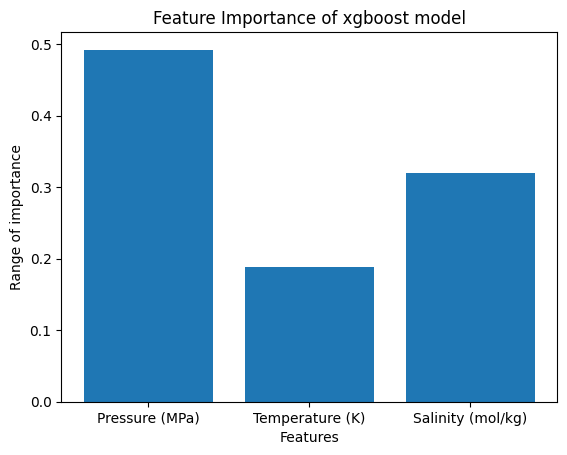

In [ ]:
plt.bar(column_names, model_2.feature_importances_)
plt.title("Feature Importance of xgboost model")
plt.xlabel("Features")
plt.ylabel("Range of importance")
plt.savefig("/content/drive/MyDrive/Research_Project_with_Turkson/CO2_Solubility/Xgboost_feature_importance.pdf")
plt.show()

**Residual Analysis**<br>
Residual Analysis examines prediction errors to validate model performance and identify systematic biases.   

The residual distribution reveals:
  
Whether our model captures the underlying physics correctly
Model performance consistency across different operating conditions
Presence of systematic prediction biases or patterns

In [ ]:
def residual_plot_display (y_true,y_pred,model):
  """This takes in the argument y_true and y_pred and returns a distribution plot of residual from the predicted data
  Model input is a string for naming the file"""

  import seaborn as sns
  plt.figure(figsize=(10,10))
  sns.distplot(y_true - y_pred, bins = 20, color = 'red', hist_kws = {'edgecolor': "black"})
  plt.xlabel('Residuals', fontweight = 'bold')
  plt.ylabel('Density', fontweight = 'bold')
  plt.title('DT', fontweight = 'bold')
  plt.savefig(f"/content/drive/MyDrive/Research_Project_with_Turkson/CO2_Solubility/{model}_residuals.png")
  plt.show()
  return print(f"This is the {model} prediction residuals dsitribution")



/tmp/ipython-input-753639142.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_true - y_pred, bins = 20, color = 'red', hist_kws = {'edgecolor': "black"})


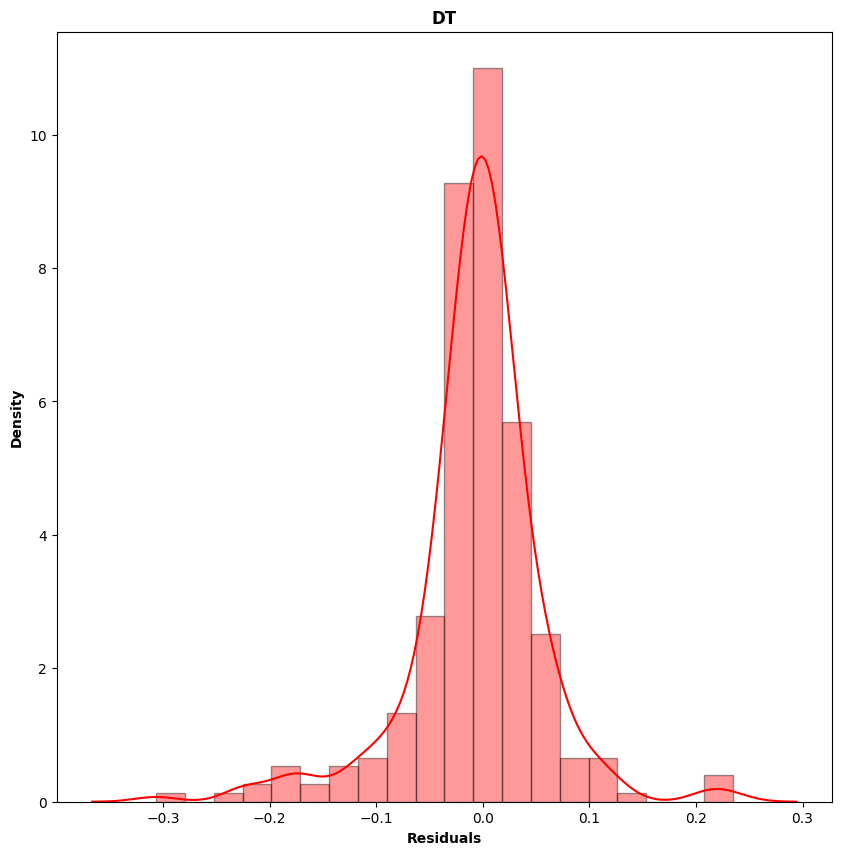

This is the Xgboost prediction residuals dsitribution


In [ ]:
residual_plot_display(y_test, model_2.predict(X_test), model = "Xgboost")

In [ ]:
def skew_and_kurtosis(y_pred):
  """ Takes input of a series of float point values from model predictions and returns a tuple of skew and kurtosis respectively"""
  from scipy.stats import skew, kurtosis
  import pandas as pd
  df = pd.DataFrame({"y_pred": y_pred}, index = [x for x in range(len(y_pred))])
  return df.skew(), df.kurtosis()

In [ ]:
xg_sk = skew_and_kurtosis(model_2.predict(X_test))
print(xg_sk)

(y_pred    0.111495
dtype: float32, y_pred   -0.7643
dtype: float32)


## Residual Analysis
The residual density plot demonstrates exceptional model performance and prediction reliability:
Key Observations:
- Peak density ~9.8: Residuals extremely concentrated around 0.0, indicating highly precise, unbiased predictions
- Ultra-tight distribution: Vast majority of residuals within ±0.05 range
- Sharp peak: Very narrow distribution centered exactly at zero
- Minimal spread: Secondary density regions around ±0.1 with density ~2-3
- Negligible outliers: Extremely few residuals beyond ±0.15, with virtually no density beyond ±0.2
- Perfect symmetry: Distribution precisely centered at zero with balanced tails
Statistical Characteristics:
- Skewness: 0.111 - Extremely close to zero, confirming nearly perfect symmetry and unbiased predictions
- Kurtosis: -0.764 - Platykurtic distribution indicating fewer extreme residuals and more consistent error patterns
## Interpretation:
- Exceptional model accuracy: The sharp, narrow peak demonstrates remarkable prediction precision
- No systematic bias: Near-zero skewness confirms unbiased predictions across all ranges
- Highly consistent performance: Negative kurtosis indicates controlled, predictable error behavior
- Robust and reliable: Minimal outliers with consistent error patterns
This outstanding residual pattern validates our model's ability to capture CO₂ solubility physics with exceptional precision and reliability.

## SHAP (SHapley Additive exPlanations)
SHAP provides quantitative feature importance by calculating each feature's contribution to individual predictions.   
SHAP values offer both:

- Global insights: Overall feature importance across the entire dataset
- Local explanations: How features influence specific predictions

This ensures we understand which thermodynamic variables (pressure, temperature, salinity) drive CO₂ solubility variations and validates physical consistency with established theory.

In [ ]:
def shap_explainer_plot(model, X_test, feature_names, model_name):
  """Takes in the arguments model, X_test and feature names and returns a plot of the feature contributions
  returns a dsiplay plot of the features and how the impact model outcome."""


  feature_names = feature_names

  # SHAP explainer
  explainer = shap.Explainer(model)

  shap_values = explainer.shap_values(X_test)
  sample_index = 0

  plt.figure(figsize=(15, 10))

  plt.title(f"{model_name}", fontsize=30, fontweight='bold')

  shap.summary_plot(shap_values, X_test, feature_names=feature_names, show=False, color = 'red')

  plt.ylabel("Feature", fontsize=16)

  plt.savefig(f'/content/drive/MyDrive/Research_Project_with_Turkson/CO2_Solubility/{model_name}_shap.png',
              format='png',
              dpi=300,
              bbox_inches='tight')
  return plt.show()

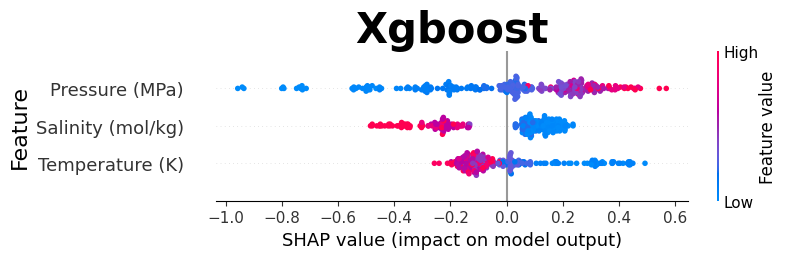

In [ ]:
X_gboost_shap = shap_explainer_plot (model_2,X_test, column_names, "Xgboost")


## SHAP Feature Importance Analysis
**Feature Impact Patterns:**

**Pressure (MPa):**
- **High pressure values** (red/purple): Consistently strong positive impact (0.2 to 0.6 SHAP values)
- **Low pressure values** (blue): Strong negative impact (-0.8 to -0.2 SHAP values)
- **Clear trend**: Higher pressure dramatically increases CO₂ solubility predictions

**Salinity (mol/kg):**
- **High salinity values** (red/purple): Strong negative impact (-0.6 to -0.2 SHAP values)
- **Low salinity values** (blue): Positive impact (0.0 to 0.3 SHAP values)
- **Inverse relationship**: Higher salinity consistently reduces CO₂ solubility

**Temperature (K):**
- **High temperature values** (red/purple): Negative impact (-0.3 to 0.0 SHAP values)
- **Low temperature values** (blue): Positive impact (0.0 to 0.4 SHAP values)
- **Clear inverse trend**: Higher temperatures decrease CO₂ solubility

## Physics Validation:
The SHAP analysis perfectly captures fundamental thermodynamic principles:
- **Pressure**: Strong positive correlation confirms Henry's Law behavior
- **Salinity**: Negative impact validates "salting-out" effect
- **Temperature**: Inverse relationship aligns with gas solubility thermodynamics

**Model Reliability**: Clear, consistent feature-impact relationships demonstrate the model learned correct physical dependencies rather than spurious correlations.

## Mean SHAP

In [ ]:
def mean_shap_value_plot(model, X_test, feature_names, model_name):
  """ Plots the mean shap values for a given model

  Parameters:
  model: a transformer object,
  X_test: array of float point numbers,
  feature_names: a list of strings
  model_name: a string

  Returns:

  A plot of the mean shap values"""
  feature_names = feature_names

  explainer = shap.Explainer(model) #passes the arg model into the method explainer to probably initialize the method (engine)
  #calls the shap_values method and pass X_test into it as the fuel
  shap_values = explainer.shap_values(X_test)
  sample_index = 0

  #now the speedometer prints out.
  plt.figure(figsize=(15, 10))

  plt.title(f"{model_name}", fontsize=30, fontweight='bold')

  shap.summary_plot(shap_values, X_test,
                    feature_names=feature_names,
                    plot_type="bar",

                    show=False,
                    color = 'red')

  plt.ylabel("Feature", fontsize=16)

  plt.savefig(f'/content/drive/MyDrive/Research_Project_with_Turkson/CO2_Solubility/{model_name}mean_shap_values.png',
              format='png',
              dpi=300,
              bbox_inches='tight')

  plt.show()

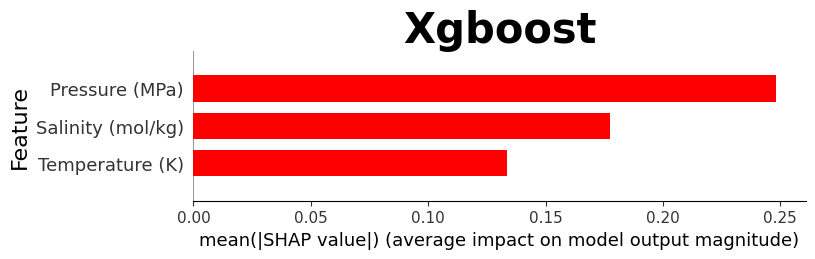

In [ ]:
Xgboost_mean_shap = mean_shap_value_plot(model_2, X_test, column_names, "Xgboost")

## Mean SHAP Feature Importance Analysis
**Average Feature Impact Magnitude:**

**Pressure (MPa): ~0.25**
- **Highest overall importance**: Pressure has the strongest average impact on CO₂ solubility predictions
- **Dominant factor**: Nearly 2x more influential than other features
- **Physical significance**: Confirms pressure as the primary driver of CO₂ dissolution

**Salinity (mol/kg): ~0.15**
- **Moderate importance**: Second most influential feature
- **Significant impact**: Substantial effect on solubility predictions
- **Chemical significance**: Validates importance of ionic effects on gas solubility

**Temperature (K): ~0.10**
- **Lowest importance**: Smallest average impact among the three features
- **Still significant**: Meaningful contribution to model predictions
- **Thermodynamic role**: Temperature effects are important but secondary to pressure and salinity

## Feature Hierarchy:
**Pressure > Salinity > Temperature**

This ranking aligns with physical understanding:
- **Pressure**: Direct mechanical effect on gas dissolution (Henry's Law)
- **Salinity**: Chemical interference with gas-water interactions
- **Temperature**: Thermodynamic effect, but often secondary to pressure effects in the studied range

The mean SHAP analysis confirms our model correctly prioritizes the most physically relevant features for CO₂ solubility prediction.

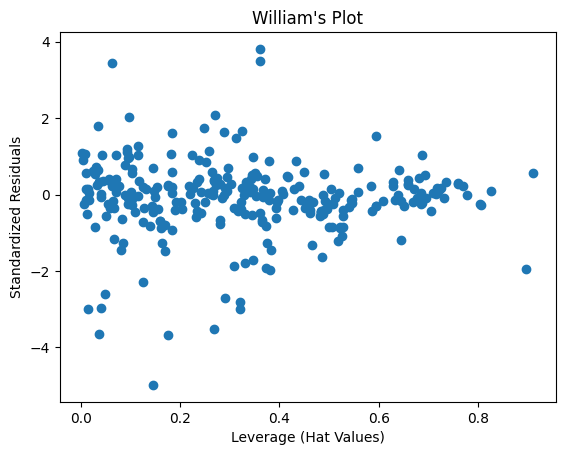

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
y_pred = model_2.predict(X_test)
residuals = y_test - y_pred

standardized_residuals = residuals / np.std(residuals)
leverage = np.abs(y_pred - np.mean(y_pred))

plt.scatter(leverage, standardized_residuals)
plt.xlabel("Leverage (Hat Values)")
plt.ylabel("Standardized Residuals")
plt.title("William's Plot")
plt.show()

# SUMMARY

This notebook demonstrates our preliminary CO₂ solubility prediction model (R² = 0.97) that provided the methodological foundation for our published research (R² > 0.98).

**Key achievements**: Rigorous validation, modular architecture, physics-informed features, reproducible workflows.

**Research evolution**: Production models incorporated one-hot encoding of salt types for enhanced complexity, contributing to the superior published performance.

This systematic approach enabled successful scaling from proof-of-concept to publication-ready research.

## Future Research Infrastructure Improvements:

1. **Object-Oriented Research Pipeline Development**
   - **Current State**: Successfully developed modular components (preprocessing functions, model training utilities, evaluation metrics, visualization tools)
   - **Next Step**: Integrate existing modular components into a comprehensive ResearchPipeline class using composition design patterns
   - **Lab Impact**: Accelerates research iterations and reduces onboarding time for new lab members

2. **Sustainable Code Architecture**
   - Transform ad-hoc analysis scripts into maintainable, well-documented frameworks
   - Implement proper software engineering practices learned through research mentorship
   

3. **Collaborative Research Tools**
   - Build standardized workflows that ensure reproducible results across lab projects
   - Create reusable ML pipelines applicable to diverse molecular modeling challenges
   - **Extensible Framework**: Continuously expand the library with new modeling and investigative techniques learned through faculty tutelage
   - **Vision**: Establish research infrastructure that multiplies lab productivity and enables systematic experimentation

**Long-term Goal**: Develop professional-grade research tools that serve as a foundation for advanced materials discovery and sustainable technology research, while continuously learning and improving under faculty guidance.

#END

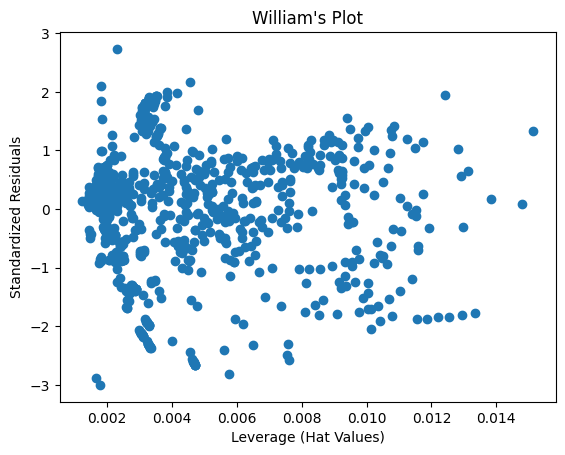

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd


# Fit linear regressor
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Leverage values
leverage = model.get_influence().hat_matrix_diag

# Standardized residuals
standardized_residuals = model.get_influence().resid_studentized_external

# DataFrame to store the data
data = pd.DataFrame({'Leverage (Hat Values)': leverage, 'Standardized Residuals': standardized_residuals})

# Excel file
data.to_excel('Williams_plot_data.xlsx', index=False)

# William's Plot
plt.scatter(leverage, standardized_residuals)
plt.xlabel("Leverage (Hat Values)")
plt.ylabel("Standardized Residuals")
plt.title("William's Plot")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_fit = rf_reg.fit(X_train, y_train)

In [ ]:
rf_training = training(rf_fit, X_train, y_train, X_test, y_test)

In [ ]:
rf_training

(0.9965578070784284,
 0.995925632486443,
 0.0007076293064035039,
 0.0007111896599199981,
 0.012824087719298266,
 0.02052399999999992)

# Cross_validate and grid search

In [ ]:
from sklearn.metrics import r2_score

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],       # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be at a leaf node
}

# Create the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Perform Grid Search Cross Validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (R^2):", grid_search.best_score_)

# Evaluate the best model on the test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Test R^2 Score:", r2)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score (R^2): 0.9716978846312031
Test R^2 Score: 0.9963606209358482
